In [1]:
# imports
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load the dataset
(x_train,y_train), (x_test,y_test) = cifar10.load_data()

[[3]
 [8]
 [8]
 ...
 [5]
 [1]
 [7]]


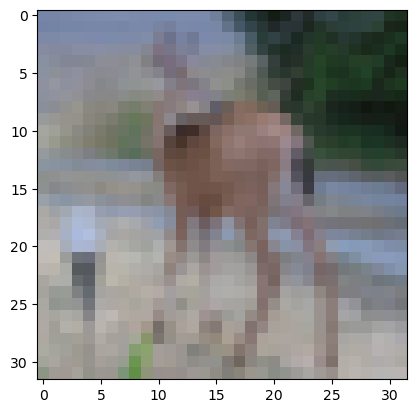

In [3]:
plt.imshow(x_test[100])
print(y_test)

In [4]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [5]:
# preprocessing the data

#Flattening the input Images 
x_train = x_train.reshape(-1,3072,).astype('float')/255.0  #multiplying 3 on flattening due to colored images.
x_test = x_test.reshape(-1,3072,).astype('float')/255.0  # 3 refers 3 channels as R,G,B

# One- Hot coding labels.
y_train = to_categorical(y_train,10)  
y_test = to_categorical(y_test,10)

In [6]:
# Using the Model

model = Sequential([
    Dense(units = 512, activation = 'relu', input_shape= (3072,)),
    Dense(units = 256, activation = 'relu'),
    Dense(units = 10, activation = 'softmax')
])

X:\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
# Compile the Model
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [8]:
# Train the model

model.fit(x_train, y_train, epochs=25, batch_size=128, validation_split=0.1)


Epoch 1/25
352/352 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.2548 - loss: 2.1632 - val_accuracy: 0.3538 - val_loss: 1.8107
Epoch 2/25
352/352 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.3869 - loss: 1.7249 - val_accuracy: 0.4160 - val_loss: 1.6382
Epoch 3/25
352/352 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.4171 - loss: 1.6311 - val_accuracy: 0.4102 - val_loss: 1.6285
Epoch 4/25
352/352 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.4461 - loss: 1.5555 - val_accuracy: 0.4438 - val_loss: 1.5633
Epoch 5/25
352/352 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.4585 - loss: 1.5064 - val_accuracy: 0.4594 - val_loss: 1.5223
Epoch 6/25
352/352 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.4734 - loss: 1.4818 - val_accuracy: 0.4616 - val_loss: 1.5101
Epoch 7/25
352/352 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.4858 - loss: 1.4358 - val_accuracy: 0.4610 - val_loss: 1.5182
Epoch 8/25
352/352 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.4957 - loss: 1.4196 - val_accu

In [9]:
# Evaluating the Model

loss, accuracy = model.evaluate(x_test, y_test)
print(f"Accuracy : {accuracy:.4f}, Loss : {loss:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5288 - loss: 1.4166
Accuracy : 0.5224, Loss : 1.4329


In [10]:
import numpy as np
pred = model.predict(x_test)
print("Prediction for 100th image:", np.argmax(pred[100]))


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Prediction for 100th image: 4


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


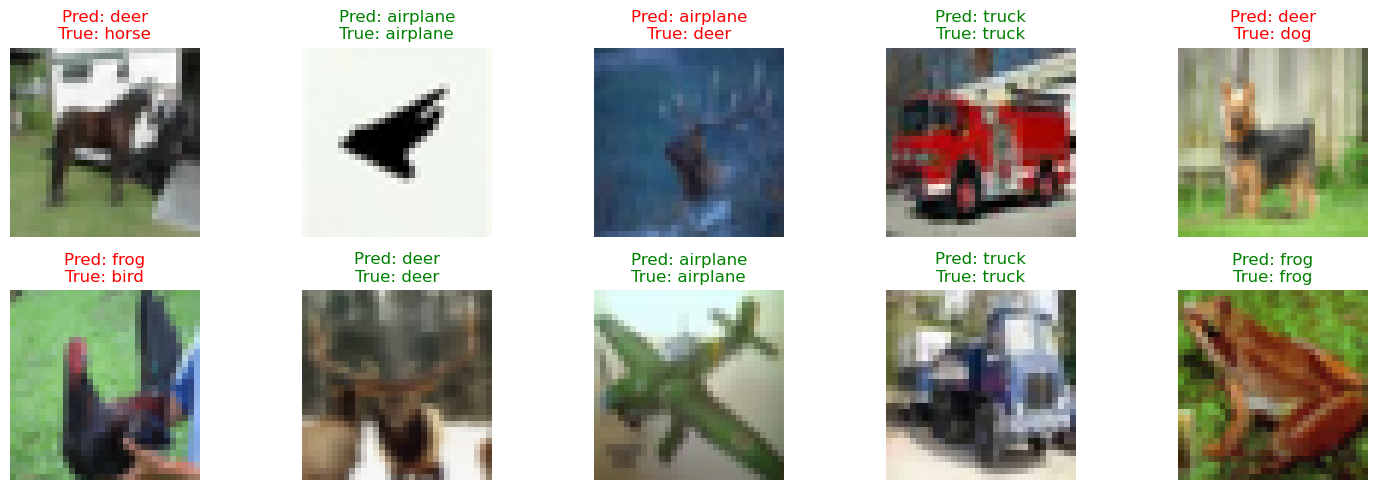

In [11]:
predictions = model.predict(x_test)

# Class labels for CIFAR-10
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

# Reshape images back to (32, 32, 3) for viewing
x_test_images = x_test.reshape(-1, 32, 32, 3)

# Get predicted and true labels
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)

# Set the range you want to visualize
start, end = 20, 30  # shows indices 20 to 29 (10 images)

plt.figure(figsize=(15, 5))
for i in range(start, end):
    plt.subplot(2, 5, i - start + 1)
    plt.imshow(x_test_images[i])
    plt.title(f"Pred: {class_names[predicted_classes[i]]}\nTrue: {class_names[true_classes[i]]}",
              color='green' if predicted_classes[i] == true_classes[i] else 'red')
    plt.axis('off')
plt.tight_layout()
plt.show()
